# single regression


<strong> Ankur Wasnik <br>181070007<br> </strong>

metadata<br>
<ul>
<li>class label [ 0 ,1] indicates whether class is virginica or not
<li>single attribute used : first attribute
    
</ul>

In [5]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
s=os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
print('Downloading Iris Dataset from :\n',s)
df = pd.read_csv(s,header=None,encoding='utf-8')


 https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [22]:
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [227]:
len(df)

150

In [162]:
class SimpleRegression():
    def __init__(self, learning_rate=0.01 , epochs=10 , random_state=1):
        self.learning_rate=learning_rate
        self.epochs = epochs
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w= [np.random.random(1)/100,np.random.random(1)/100]
        self.errors_ =[]
        #gd rule for updates
        for _ in range(self.epochs):
            error=0
            yhat_=[]
            for xi,yi in zip(X,y) :
                net_input=self.net_input(xi)
                yhat=self.activation(net_input)
                yhat_.append(yhat)
                error+= yhat -yi
                
            self.w[0]+=self.learning_rate*(error)
            self.w[1]+=self.learning_rate*(xi*error)
            cost = -y*(np.log(yhat)) - (1-y)*(np.log(1-yhat))
            self.errors_.append(cost)            
        return self
    def net_input(self,X):
        return X*self.w[1]+self.w[0]
    def activation(self,X):
        return X 
    def getW(self):
        return (self.w[0] ,self.w[1]) #base and weights  
    def predict(self,X,threshold=0.2):
        return np.where( self.activation(self.net_input(X)) >= threshold , 1 , -1)

In [199]:
def simpleRegression(target_val,learning_rate,epochs,n_features=1,random_state=181070007 ):
    y=df.iloc[0:100,4].values
    y=np.where(y==target_val,-1,1)
    X=df.iloc[0:100,nfeatures].values
    plt.scatter(X,y)
    lreg=SimpleRegression(learning_rate=learning_rate , epochs=epochs , random_state=random_state)
    lreg.fit(X,y)
    #We are done with training and You can predict on our trained model.
    ''' Testing our trained data with one of trained data sample \nBut you are free to do on testing data.'''
    y_test = df.iloc[132 , 4]
    y_test = np.where(y_test==target_val , -1,1)
    X_test = df.iloc[132, nfeatures ] 
    pred=lreg.predict(X_test,threshold=0.6 )
    print('Predicted Label for Testing data: '  , pred)
    print('True Label for Testing data : ' , y_test)
    if pred==y_test :
        print('\n***Correct Prediction***\n')
    w_=lreg.getW()
    print("Intercept:\t{}\nWeightMatrix:\t{}".format(w_[0],w_[1]))
    testy=df.iloc[100:,4].values
    testy=np.where(testy==target_val,-1,1)
    testx=df.iloc[100: ,nfeatures].values
    print(testx.shape)
    print(testy.shape)
    accuracy(lreg,testx,testy)
    

In [200]:
def accuracy(regressor , testx ,testy):
    count=0
    length=len(testx)
    for xi,yi in zip(testx,testy) :
        yhat=regressor.predict(xi)
        if(yhat==yi):
            count+=1
    ratio = count/length
    print("Accuracy is %.2f " %ratio)

Predicted Label for Testing data:  [1]
True Label for Testing data :  1

***Correct Prediction***

Intercept:	[1.56058837e+291]
WeightMatrix:	[4.36964744e+291]
(50,)
(50,)
Accuracy is 1.00 


<ipython-input-162-38ccb5b6fe8d>:23: RuntimeWarning: invalid value encountered in log
  cost = -y*(np.log(yhat)) - (1-y)*(np.log(1-yhat))


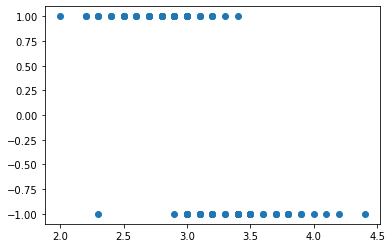

In [201]:
simpleRegression(target_val='Iris-setosa',learning_rate=0.001,epochs=1000,n_features=1,random_state=181070007)

# multiple regression : 
using multiple attributes 

In [185]:
class MultipleRegression():
    def __init__(self, learning_rate=0.01 , epochs=10 , random_state=1):
        self.learning_rate=learning_rate
        self.epochs = epochs
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.errors_ =[]
        #gd rule for updates
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            y_hat = self.activation(net_input)
            errors = (y_hat - y)
            self.w_[0]+=self.learning_rate*(errors.sum())
            self.w_[1:]+= self.learning_rate*(np.dot(X.T,errors))
            cost = -y*(np.log(y_hat)) - (1-y)*(np.log(1-y_hat))
            self.errors_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,X):
        return 1.0/(1.0+np.exp(-X)) 
    def getW(self):
        return (self.w_[0] ,self.w_[1:]) #base and weights 
    def predict(self,X,threshold=0.2):
        return np.where( self.activation(self.net_input(X)) >= threshold , 1 , -1)

In [234]:
def multiple_reg(features, learning_rate , epochs ,random_state):
    target_val='Iris-virginica'
    y=df.iloc[0:100,4].values
    y=np.where(y==target_val,-1,1)
    X=df.iloc[0:100,features].values
    plt.plot(X,y)
    xticks=np.linspace( 0,7,num=10  )
    xticks=np.array(xticks)
    plt.xticks(xticks)
    lreg=LinearRegression(learning_rate=learning_rate , epochs=epochs , random_state=random_state)
    lreg.fit(X,y)
    #We are done with training and You can predict on our trained model.
    ''' Testing our trained data with one of trained data sample \nBut you are free to do on testing data.'''
    y_test = df.iloc[134 , 4]
    y_test = np.where(y_test==target_val , -1,1)
    X_test = df.iloc[134, features ].values
    pred=lreg.predict(X_test,threshold=0.6 )
    print('Predicted Label for Testing data: '  , pred)
    print('True Label for Testing data : ' , y_test)
    if pred==y_test :
        print('\n***Correct Prediction***\n')
    w_=lreg.getW()
    print("Intercept:\t{}\nWeightMatrix:\t{}".format(w_[0],w_[1]))
    testy=df.iloc[100:,4].values
    testy=np.where(testy==target_val,-1,1)
    testx=df.iloc[100: ,features].values
    print(testx.shape)
    print(testy.shape)
    accuracy_multiple(lreg,testx,testy)

In [235]:
def accuracy_multiple(lreg,testx,testy):
    count=0
    length=len(testx)
    for xi,yi in zip(testx,testy):
        pred=lreg.predict(xi)
        if pred==yi:
            count+=1
    print('accuracy={}'.format(np.round(count/length),2))

Predicted Label for Testing data:  -1
True Label for Testing data :  -1

***Correct Prediction***

Intercept:	-0.9397493056511658
WeightMatrix:	[-5.16340194 -2.9309597  -0.74495507]
(50, 3)
(50,)
accuracy=1.0


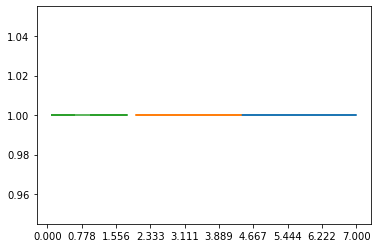

In [236]:
multiple_reg([0,1,3],0.001 , 10,34)